<a href="https://colab.research.google.com/github/junheeyoon/colab/blob/master/2_3_%EC%A0%84%EC%B2%98%EB%A6%AC_Pandas_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 읽기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 현재 경로 확인
import os
print(os.path.abspath(os.curdir))

# Root 경로 설정
import os
os.chdir('/content/drive/MyDrive/데이터분석')

/content


1) 데이터 읽기

In [ ]:
import pandas as pd
path_to_data = './data/Titanic/train.csv'
df = pd.read_csv(path_to_data, encoding='cp949')

# DataFrame type 확인
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1. 타이타닉 데이터, '나이'에 대해서, z-score nomalization 할 것
  - 표 & plot로 출력

In [ ]:
#Age NaN 값 제거
import numpy as np
age_remove_nan = np.array(df['Age'].dropna())
import scipy.stats as ss

#zscore 값 출력
age_zscore = ss.zscore(age_remove_nan)
age_zscore

array([-0.53037664,  0.57183099, -0.25482473,  0.36516706,  0.36516706,
        1.67403863, -1.90813618, -0.18593675, -1.08148046, -1.77036023,
        1.94959054, -0.6681526 ,  0.64071897, -1.08148046,  1.74292661,
       -1.90813618,  0.08961515,  0.36516706,  0.29627909, -1.01259248,
       -0.11704878, -1.49480832,  0.57183099, -0.73704057,  0.70960695,
        2.50069435, -0.11704878,  0.8473829 , -0.59926462, -0.80592855,
       -1.08148046,  0.70960695, -0.18593675, -1.83924821, -0.73704057,
       -0.80592855, -1.5636963 , -0.59926462,  1.32959874, -0.0481608 ,
        2.43180638, -0.59926462, -0.08260479, -1.70147225, -1.28814439,
       -0.53037664,  0.57183099,  1.05404683, -1.77036023, -0.0481608 ,
       -0.73704057, -0.87481653, -0.25482473,  0.15850313, -0.9437045 ,
       -0.59926462, -0.25482473,  0.15850313, -0.32371271, -1.98873512,
        0.02072718, -0.53037664, -0.0481608 , -0.11704878, -0.87481653,
        0.22739111, -0.9437045 , -0.46148866, -0.39260069, -0.04

In [ ]:
#np_array -> DataFrame 변환(표)
df_zscore = pd.DataFrame(age_zscore, columns=['AgeZscore'])
df_zscore

,AgeZscore
0,-0.530377
1,0.571831
2,-0.254825
3,0.365167
4,0.365167
...,...
709,0.640719
710,-0.185937
711,-0.737041
712,-0.254825


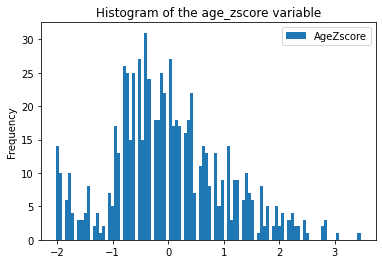

In [ ]:
#plot 형식으로 출력
df_zscore.plot.hist(
  bins = 100,
  title = "Histogram of the age_zscore variable"
)

## 2. 타이타닉 데이터, '이름'을 제외한 나머지 feature들의 correlation 구하기
  - Category 요소들의 encoding은 좋은 방법으로 알아서 할 것
  - 'Survived'와 상관계수 가장 높은 feature와 가장 낮은 feature 찾기

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Label Encoding
#하나의 라벨을 하나의 정수와 대응시켜 Encoding 한다.
df['Sex_label'] = pd.Categorical(df['Sex']).codes
df['Ticket_label'] = pd.Categorical(df['Ticket']).codes
df['Cabin_label'] = pd.Categorical(df['Cabin']).codes
df['Embarked_label'] = pd.Categorical(df['Embarked']).codes
df[['Sex', 'Sex_label', 'Ticket_label', 'Cabin_label', 'Embarked_label']]

df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [ ]:
#상관관계 표시 
#(-1 : 음의 상관관계 / 0 : 상관없음 / 1 : 양의 상관관계)
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_label,Ticket_label,Cabin_label,Embarked_label
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.042939,-0.056554,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351,-0.164549,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900,0.319869,-0.537419,0.173511
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153,-0.068848,0.157950,-0.039610
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631,0.079461,-0.024829,0.071480
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489,0.020003,0.033585,0.043351
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333,-0.013885,0.310987,-0.230365
Sex_label,0.042939,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000,0.059372,-0.137704,0.118492
Ticket_label,-0.056554,-0.164549,0.319869,-0.068848,0.079461,0.020003,-0.013885,0.059372,1.000000,-0.176515,0.011146
Cabin_label,-0.000637,0.276235,-0.537419,0.157950,-0.024829,0.033585,0.310987,-0.137704,-0.176515,1.000000,-0.070245


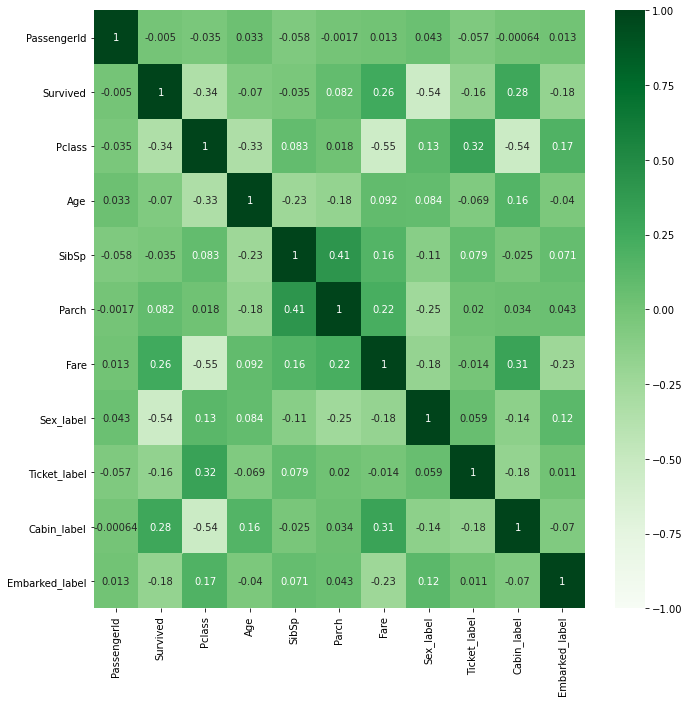

In [ ]:
#heatmap으로 상관관계를 표시
import seaborn as sb
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (11,11)
sb.heatmap(df.corr(),
           annot = True, #실제 값 화면에 나타내기
           cmap = 'Greens', #색상
           vmin = -1, vmax=1 , #컬러차트 영역 -1 ~ +1
          )

### 'Survived'와 상관계수 가장 높은 feature : Sex
### 'Survived'와 상관계수 가장 낮은 feature : PassengerId

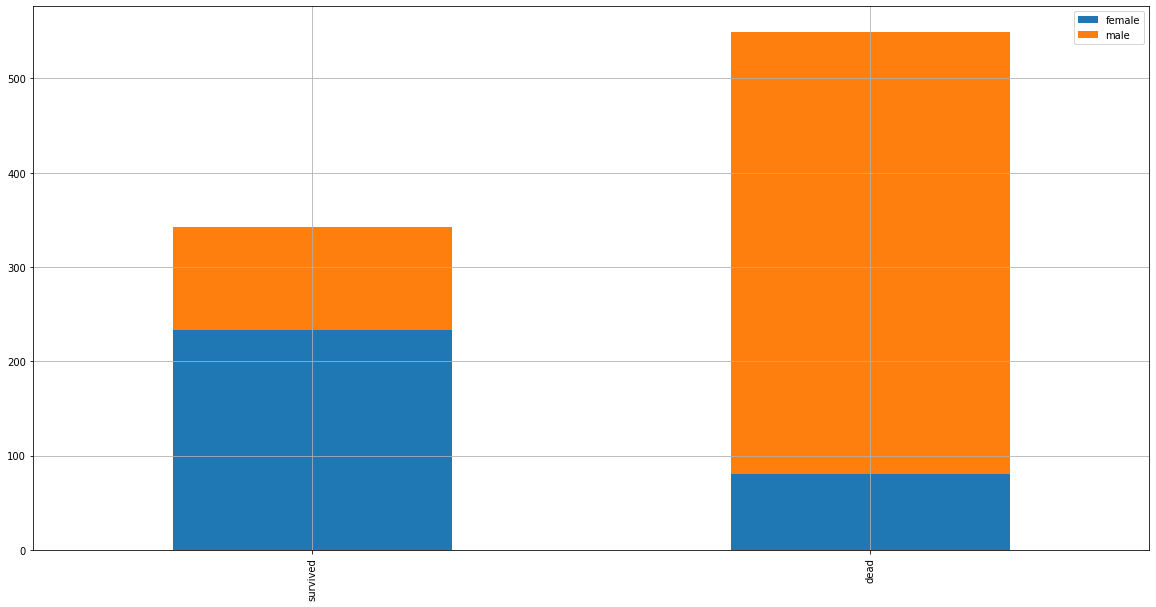

In [ ]:
# Survived or Dead 과 성별(Sex)와의 관계
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['axes.grid'] = True 

def bar_chart(feature):
    survived = df[df['Survived']==1][feature].value_counts()
    dead = df[df['Survived']==0][feature].value_counts()
    df_feature = pd.DataFrame([survived,dead])
    df_feature.index = ['survived','dead']
    df_feature.plot(kind='bar',stacked=True)
bar_chart('Sex')